# Convolution Neural Networks

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cats vs Dogs DataSet

# 1. Data Preparation

In [7]:
# Organize data into train, valid and test dirs
os.chdir('dogs-vs-cats/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c, 'test/dog')
        
os.chdir('../../')

In [9]:
train_path = 'dogs-vs-cats/dogs-vs-cats/train'
valid_path = 'dogs-vs-cats/dogs-vs-cats/valid'
test_path = 'dogs-vs-cats/dogs-vs-cats/test'

In [14]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['cat','dog'],batch_size = 10)

Found 1000 images belonging to 2 classes.


In [17]:
valid_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['cat','dog'],batch_size = 10)

Found 200 images belonging to 2 classes.


In [19]:
test_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory= test_path, target_size = (224,224), classes = ['cat','dog'],batch_size = 10, shuffle = False)

Found 100 images belonging to 2 classes.


In [30]:
imgs, label = next(train_batches)

In [31]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

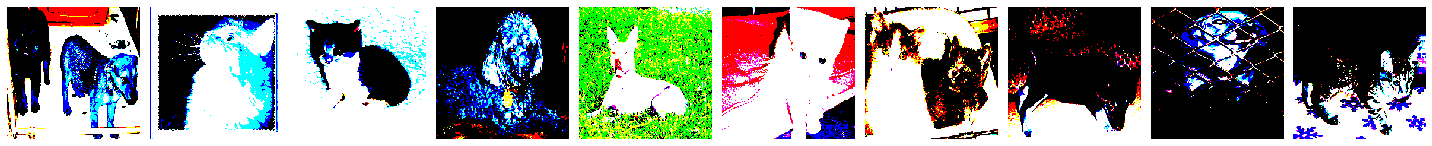

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [45]:
plotImages(imgs)
print(label)

# 2. Build and train a CNN

In [47]:
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dense(units = 2, activation = 'softmax'),
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [60]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
model.fit(x = train_batches, validation_data = valid_batch, epochs = 10, verbose = 2)

Epoch 1/10
100/100 - 46s - loss: 0.0492 - accuracy: 0.9870 - val_loss: 1.4734 - val_accuracy: 0.6350
Epoch 2/10
100/100 - 47s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5314 - val_accuracy: 0.6500
Epoch 3/10
100/100 - 46s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.6257 - val_accuracy: 0.6500
Epoch 4/10
100/100 - 45s - loss: 7.5762e-04 - accuracy: 1.0000 - val_loss: 1.6932 - val_accuracy: 0.6500
Epoch 5/10
100/100 - 46s - loss: 4.5298e-04 - accuracy: 1.0000 - val_loss: 1.7399 - val_accuracy: 0.6550
Epoch 6/10
100/100 - 45s - loss: 2.9220e-04 - accuracy: 1.0000 - val_loss: 1.7786 - val_accuracy: 0.6550
Epoch 7/10
100/100 - 47s - loss: 1.8961e-04 - accuracy: 1.0000 - val_loss: 1.7997 - val_accuracy: 0.6600
Epoch 8/10
100/100 - 50s - loss: 1.1517e-04 - accuracy: 1.0000 - val_loss: 1.8318 - val_accuracy: 0.6550
Epoch 9/10
100/100 - 82s - loss: 6.5275e-05 - accuracy: 1.0000 - val_loss: 1.8600 - val_accuracy: 0.6450
Epoch 10/10
100/100 - 70s - loss: 3.3247e-05 - accuracy: 1.0000 - v

# 3. Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

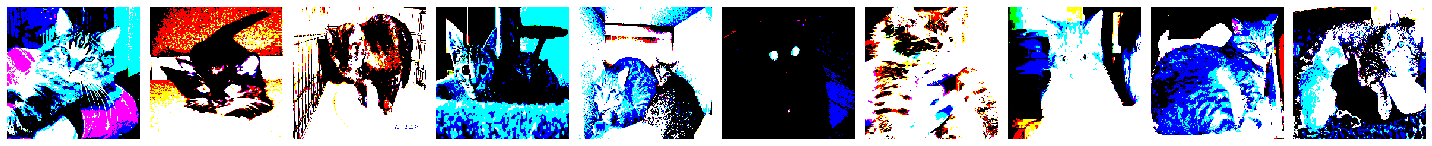

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [62]:
test_imgs, test_labels = next(test_batch)
plotImages(test_imgs)
print(test_labels)

In [64]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [80]:
predictions = model.predict(x = test_batch, verbose = 0)
np.round(predictions[:10])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [74]:
cm = confusion_matrix(y_true = test_batch.classes, y_pred = np.argmax(predictions, axis = -1))

In [75]:
cm

array([[28, 22],
       [23, 27]])

In [77]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

# Build a Fine-Tune VGG16 (pre-trained) Model

In [81]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 1401s 3us/step


In [82]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [88]:
model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [94]:
for layer in model.layers:
    layer.trainable = False

In [96]:
model.add(Dense(units = 2, activation = 'softmax'))

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train the fine-tuned VGG16 Model

In [99]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [100]:
model.fit(x = train_batches, epochs = 2, verbose = 2, validation_data = valid_batch)

Epoch 1/2
100/100 - 372s - loss: 0.2547 - accuracy: 0.8950 - val_loss: 0.1106 - val_accuracy: 0.9650
Epoch 2/2
100/100 - 360s - loss: 0.0714 - accuracy: 0.9790 - val_loss: 0.0822 - val_accuracy: 0.9750


In [101]:
model.fit(x = train_batches, epochs = 2, verbose = 3, validation_data = valid_batch)

Epoch 1/2
Epoch 2/2


In [117]:
predictions = model.predict(test_batch)

In [119]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [121]:
np.argmax(predictions, -1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
confusion_matrix(test_batch.classes, np.argmax(predictions, -1))

array([[48,  2],
       [ 1, 49]])

# MobileNet Model Image Classification 

In [123]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils


# 1. Sample Random Image Predicted on MobileNet Model

In [125]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 40s 2us/step


In [137]:
def prepare_image(file):
    path = ''
    img = image.load_img(path = path + file, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

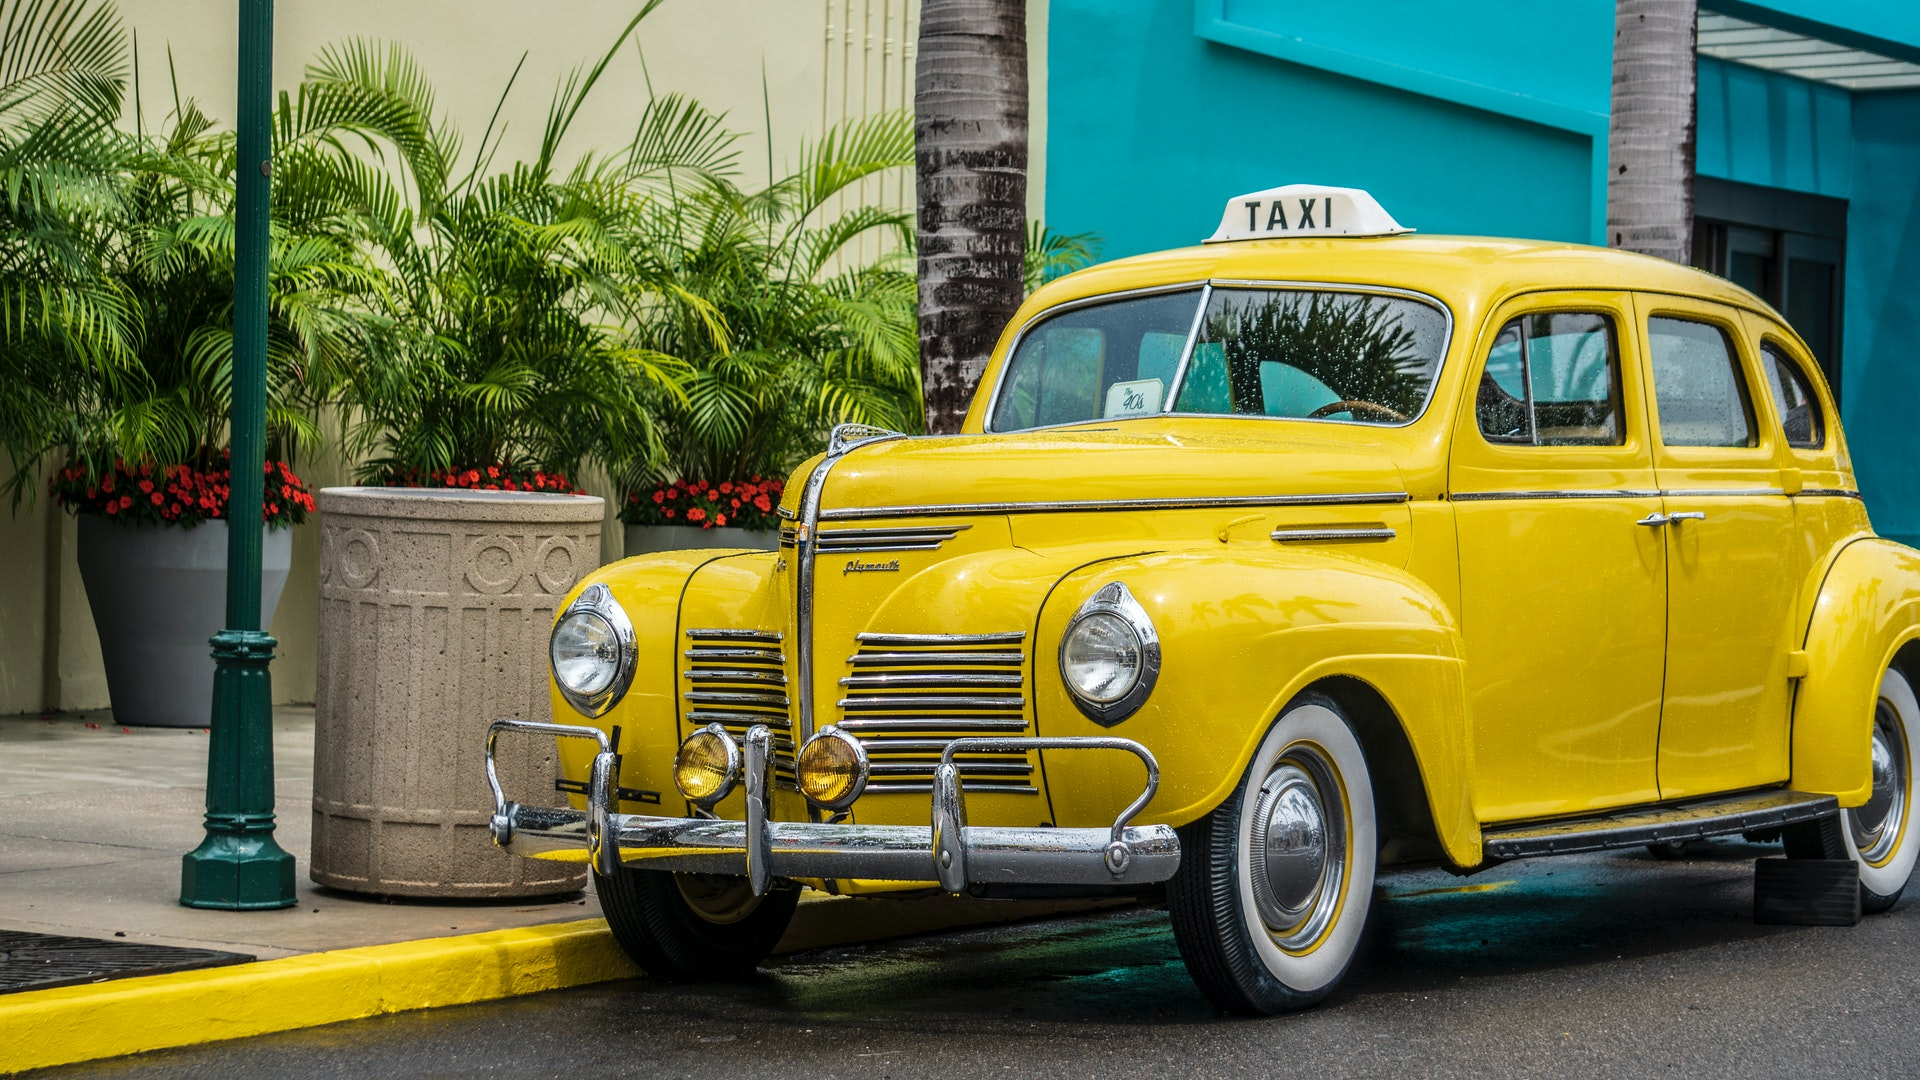

In [150]:
from IPython.display import Image
Image(filename = 'taxi.jpg', width = 800, height = 600)

In [151]:
predictions = mobile.predict(prepare_image('taxi.jpg'))

In [152]:
imagenet_utils.decode_predictions(predictions)

[[('n02930766', 'cab', 0.7748005),
  ('n03930630', 'pickup', 0.116619825),
  ('n03345487', 'fire_engine', 0.046531405),
  ('n02701002', 'ambulance', 0.007381298),
  ('n03769881', 'minibus', 0.0066713733)]]

# Sign Language DataSet

# 2. Process Image for Fine Tuned MobileNet

In [153]:
os.chdir('Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0,10):
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'),5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

os.chdir('..')

In [155]:
train_path = 'Sign-Language-Digits-Dataset/train'
valid_path = 'Sign-Language-Digits-Dataset/valid'
test_path = 'Sign-Language-Digits-Dataset/test'

In [157]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory = train_path, target_size = (224,224), batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory = valid_path, target_size = (224,224), batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory = test_path, target_size = (224,224), batch_size = 10, shuffle = False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


# 3. Modify Model

In [158]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [159]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [166]:
len(mobile.layers)

93

In [167]:
x = mobile.layers[-6].output
output = Dense(units = 10, activation = 'softmax')(x)

In [170]:
model = Model(inputs = mobile.input, outputs = output)

In [174]:
mobile.input

<tf.Tensor 'input_4:0' shape=(None, 224, 224, 3) dtype=float32>

In [175]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [176]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

# 4. Train the Model

In [179]:
model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [180]:
model.fit(x = train_batches, epochs = 10, validation_data = valid_batches, verbose = 2)

Epoch 1/10
172/172 - 124s - loss: 0.6221 - accuracy: 0.8277 - val_loss: 0.2615 - val_accuracy: 0.9267
Epoch 2/10
172/172 - 105s - loss: 0.1203 - accuracy: 0.9801 - val_loss: 0.1221 - val_accuracy: 0.9600
Epoch 3/10
172/172 - 96s - loss: 0.0611 - accuracy: 0.9936 - val_loss: 0.0695 - val_accuracy: 0.9867
Epoch 4/10
172/172 - 95s - loss: 0.0334 - accuracy: 0.9982 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 5/10
172/172 - 93s - loss: 0.0223 - accuracy: 0.9988 - val_loss: 0.0506 - val_accuracy: 0.9867
Epoch 6/10
172/172 - 93s - loss: 0.0193 - accuracy: 0.9977 - val_loss: 0.0485 - val_accuracy: 0.9867
Epoch 7/10
172/172 - 93s - loss: 0.0145 - accuracy: 0.9994 - val_loss: 0.0475 - val_accuracy: 0.9867
Epoch 8/10
172/172 - 94s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 0.9900
Epoch 9/10
172/172 - 93s - loss: 0.0089 - accuracy: 0.9988 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 10/10
172/172 - 93s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0315 - val_accu

# Predict Sign Language Digits

In [183]:
test_labels = test_batches.classes

In [184]:
predictions = model.predict(test_batches)

In [186]:
confusion_matrix(test_labels, predictions.argmax(axis = -1))

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])